<h1> Visualisation sur des données concernant Titanic</h1>

<h3>1-Préparation de donnée</h3>

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
import pandas as pd

data_csv = pd.read_csv('./DATASETS/titanic_prediction.csv')
data_csv = data_csv.drop(columns=['zero.'+str(i) for i in range(1,19)])
data_csv = data_csv.drop(columns=['zero',])
data_csv = data_csv.rename(columns={'2urvived': 'survived'})

<h3>2-Prétraitement et visualisation</h3>

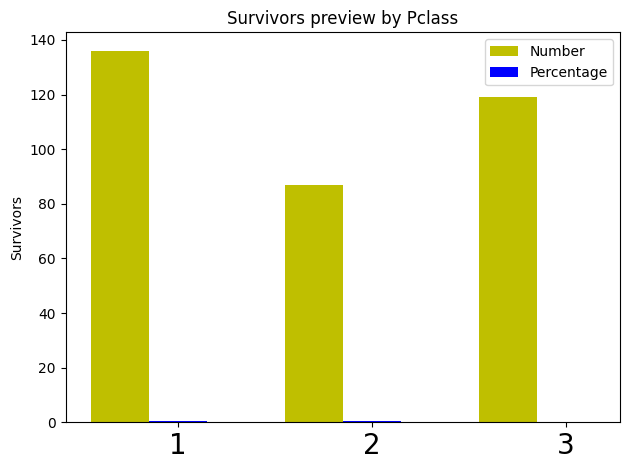

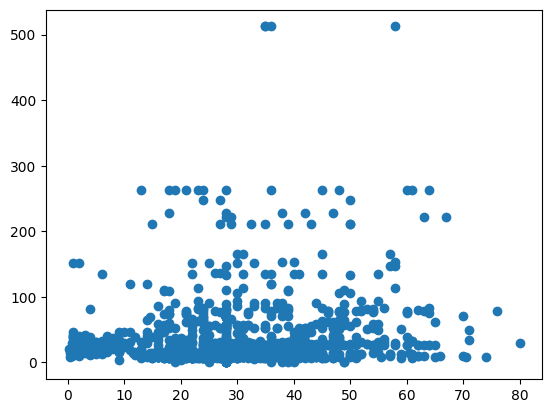

In [81]:
def survivor_by_attribute(data,_attribute):
    null_count =data[_attribute].isnull().value_counts()
    try:
        is_null = dict(null_count)[True]
    except:
        is_null = None
    if is_null is not None :
        data = data[np.isfinite(data[_attribute])] 
    
    survivors_by = data.groupby(_attribute)['survived'].agg(sum)
    
    total_passenger = data.groupby(_attribute)['Passengerid'].count()
    
    percentage_by =  survivors_by / total_passenger
    
    fig = plt.figure()
 
    ax = fig.add_subplot(111)
    index = np.arange(survivors_by.count())
    bar_width = 0.30
    ax.bar(index , survivors_by, bar_width, color='y', label='Number')
    ax.bar(index + bar_width, percentage_by,  bar_width, color='blue', label='Percentage')
    
    ax.set_ylabel('Survivors')
    ax.set_title('Survivors preview by '+ _attribute)
    
    XtickMarks = survivors_by.index.values.tolist()
    ax.set_xticks(index + bar_width)
    
    XtickNames = ax.set_xticklabels(XtickMarks)
    plt.setp(XtickNames, fontsize=20)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
survivor_by_attribute(data_csv, 'Pclass')
plt.scatter(data_csv['Age'], data_csv['Fare'])
